The full dataset comprises 1503 spectra of diterpenes, classified into 23 different classes according to their skeleton structure.


Each instance is described by:

- the first four numbers are expert designed features (you can ignore them for the classification task),
- the next item is an ID,
- then we have a number of resonance frequencies with their "multiplicity", and
- finally the class.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
file_path = 'data/diterpene_shuf.csv'
data = pd.read_csv(file_path)

### Dataset Structure

In [3]:
print("Dataset Shape:", data.shape)
print("\nColumn Names:", data.columns)
print("\nFirst 5 Rows:")
print(data.head())

Dataset Shape: (1202, 46)

Column Names: Index(['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20',
       'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30',
       'a31', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40',
       'a41', 'a42', 'a43', 'a44', 'a45c'],
      dtype='object')

First 5 Rows:
   a0  a1  a2  a3     a4 a5     a6 a7     a8 a9  ...    a36 a37   a38 a39  \
0   2   4   8   6  v1493  t  139.2  q   33.2  d  ...  134.5   t  24.2   q   
1   2   4   8   6  v1255  d  144.0  q   66.7  d  ...   22.4   s  37.7   q   
2   2   4   8   6  v2194  d   30.7  t   26.8  t  ...   16.7   t  35.4   q   
3   3   4   9   4  v2021  t   37.2  t   17.4  q  ...   33.5   d  44.9   d   
4   3   4   9   4  v1051  q   12.2  d  154.6  t  ...   49.5   t  38.8   t   

    a40 a41   a42 a43    a44 a45c  
0  14.4   t  42.2   t   18.6  52c  
1  19.7   q  16.5   t   26.6  54c  
2 

The dataset has 1202 instances (rows) and 46 variables (columns). The first 45 columns are named ax, x being a number from 0 to 45, and the last column is named a45c.

In [4]:
print("\nData Types for Each Column:")
print(data.dtypes)

print("\nSummary of Value Types:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"  - Data Type: {data[column].dtype}")
    print(f"  - Number of Unique Values: {len(unique_values)}")
    print(f"  - Example Values: {unique_values[:5]}")
    print("-" * 40)


Data Types for Each Column:
a0        int64
a1        int64
a2        int64
a3        int64
a4       object
a5       object
a6      float64
a7       object
a8      float64
a9       object
a10     float64
a11      object
a12     float64
a13      object
a14     float64
a15      object
a16     float64
a17      object
a18     float64
a19      object
a20     float64
a21      object
a22     float64
a23      object
a24     float64
a25      object
a26     float64
a27      object
a28     float64
a29      object
a30     float64
a31      object
a32     float64
a33      object
a34     float64
a35      object
a36     float64
a37      object
a38     float64
a39      object
a40     float64
a41      object
a42     float64
a43      object
a44     float64
a45c     object
dtype: object

Summary of Value Types:
Column: a0
  - Data Type: int64
  - Number of Unique Values: 4
  - Example Values: [2 3 4 1]
----------------------------------------
Column: a1
  - Data Type: int64
  - Number of Unique Values: 6

Patterns in the dataset:
- first 4 columns are of type integer, having 4, 6, 8, 8 unique values respectively (=> we should ignore them as specified in the task)
- column a4 (5th column) is of type "object", has 1202 unique values, example values: 'v1493', 'v1255' (IDs)
- starting from the 6th column, every other column is of type char, with the following unique values: ['t' 'd' 'q' 's'] (=> categorical variables)
- starting from the 7th column, every other column is of type float64 with similar ranges (=> numerical variable)
- the last column (a45c) is of type "object", has 22 unique values, example values: '52c', '54c', '3c' (=> categorical variable) - class -> output variable

### Preprocessing

As the first four columns are not important for the classification task, we will delete them.

In [5]:
data = data.iloc[:, 5:] 

In [6]:

has_missing = data.isnull().values.any()
print("Are there missing values in the dataset?", has_missing)


Are there missing values in the dataset? False


There are no missing values.

In [7]:
categorical_columns = [col for col in data.columns[:-1:2]]  # Alternating categorical columns
numerical_columns = [col for col in data.columns[1:-1:2]]  # Alternating numerical columns
class_column = data.columns[-1]  # The last column is the target class

In [8]:

print(f"Categorical Columns: {categorical_columns}")
print(f"Numerical Columns: {numerical_columns}")
print(f"Class Column: {class_column}")

Categorical Columns: ['a5', 'a7', 'a9', 'a11', 'a13', 'a15', 'a17', 'a19', 'a21', 'a23', 'a25', 'a27', 'a29', 'a31', 'a33', 'a35', 'a37', 'a39', 'a41', 'a43']
Numerical Columns: ['a6', 'a8', 'a10', 'a12', 'a14', 'a16', 'a18', 'a20', 'a22', 'a24', 'a26', 'a28', 'a30', 'a32', 'a34', 'a36', 'a38', 'a40', 'a42', 'a44']
Class Column: a45c


In [9]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [10]:
X = data.iloc[:, :-1]  # All columns except the last (features)
y = data.iloc[:, -1]   # Last column (target)
class_counts = y.value_counts()
print(class_counts)

a45c
52c    359
3c     285
54c    280
22c    119
4c      59
5c      28
47c     10
36c     10
18c     10
28c      8
33c      7
2c       7
71c      5
80c      5
15c      2
79c      2
46c      1
8c       1
64c      1
31c      1
60c      1
10c      1
Name: count, dtype: int64


Some classes are underrepresented (especially those with only one training example).
To decide what to do, expertise knowledge is required. Rather than deleting the columns, we merge the underrepresented classes into class "Other" in order to retain the information of the dataset.

In [11]:
rare_classes = class_counts[class_counts <=5].index
y = y.replace(rare_classes, 'Other')

In [12]:
y.value_counts()

a45c
52c      359
3c       285
54c      280
22c      119
4c        59
5c        28
Other     20
47c       10
36c       10
18c       10
28c        8
2c         7
33c        7
Name: count, dtype: int64

In [13]:
# Encode the class column
class_encoder = LabelEncoder()
y = pd.Series(class_encoder.fit_transform(y), index=y.index, name=y.name)

We should scale the numerical variables, but first we have to split the dataset into training and test set, otherwise there would be data leakage.

In [14]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Scale the numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])  # Fit on training data
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])       # Transform test data


In [16]:
print("\nPreprocessed Data Head:")
display(X_train.head())


Preprocessed Data Head:


,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,...,a35,a36,a37,a38,a39,a40,a41,a42,a43,a44
759,1,-0.530201,3,1.945607,0,0.315394,1,-0.763720,0,0.493642,...,3,-0.523362,0,-0.315052,1,-0.591870,3,3.087273,1,-0.750889
1128,0,2.124718,3,-0.446514,2,-0.291299,1,-0.693860,3,-0.608112,...,1,-0.848670,0,-0.089469,1,-0.874406,0,-0.272015,3,-0.579544
109,3,2.022255,1,-0.550423,1,-0.983441,3,-0.907807,3,-0.447663,...,3,-0.887449,1,-0.783740,3,-0.334000,1,1.091970,3,-0.730862
754,1,-0.737404,0,0.061978,3,-0.329751,1,-0.691676,0,-0.049748,...,3,1.247519,1,0.212769,2,-0.401270,1,-0.909667,3,-0.806520
939,1,0.066358,3,-0.413351,1,-0.951398,3,-0.311810,0,0.311799,...,3,-0.859442,0,1.820324,2,-0.403513,0,0.034143,3,-0.319189


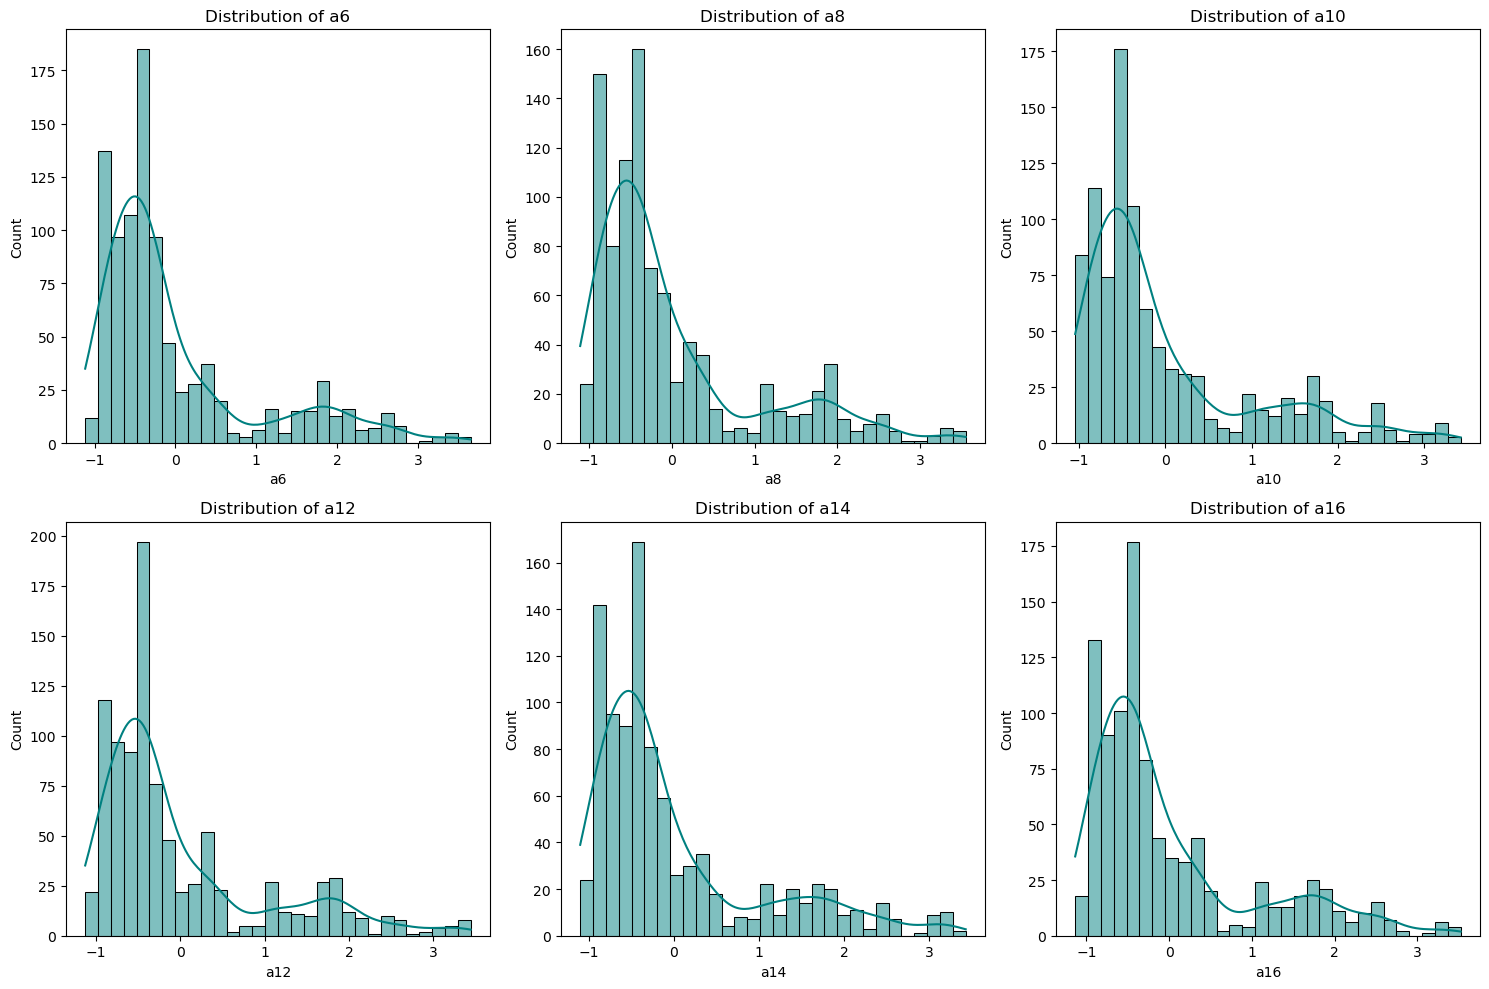

In [17]:
# 1. Distribution of Numerical Variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6], 1):  # Plot first 6 numerical columns
    plt.subplot(2, 3, i)
    sns.histplot(X_train[col], kde=True, color='teal', bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


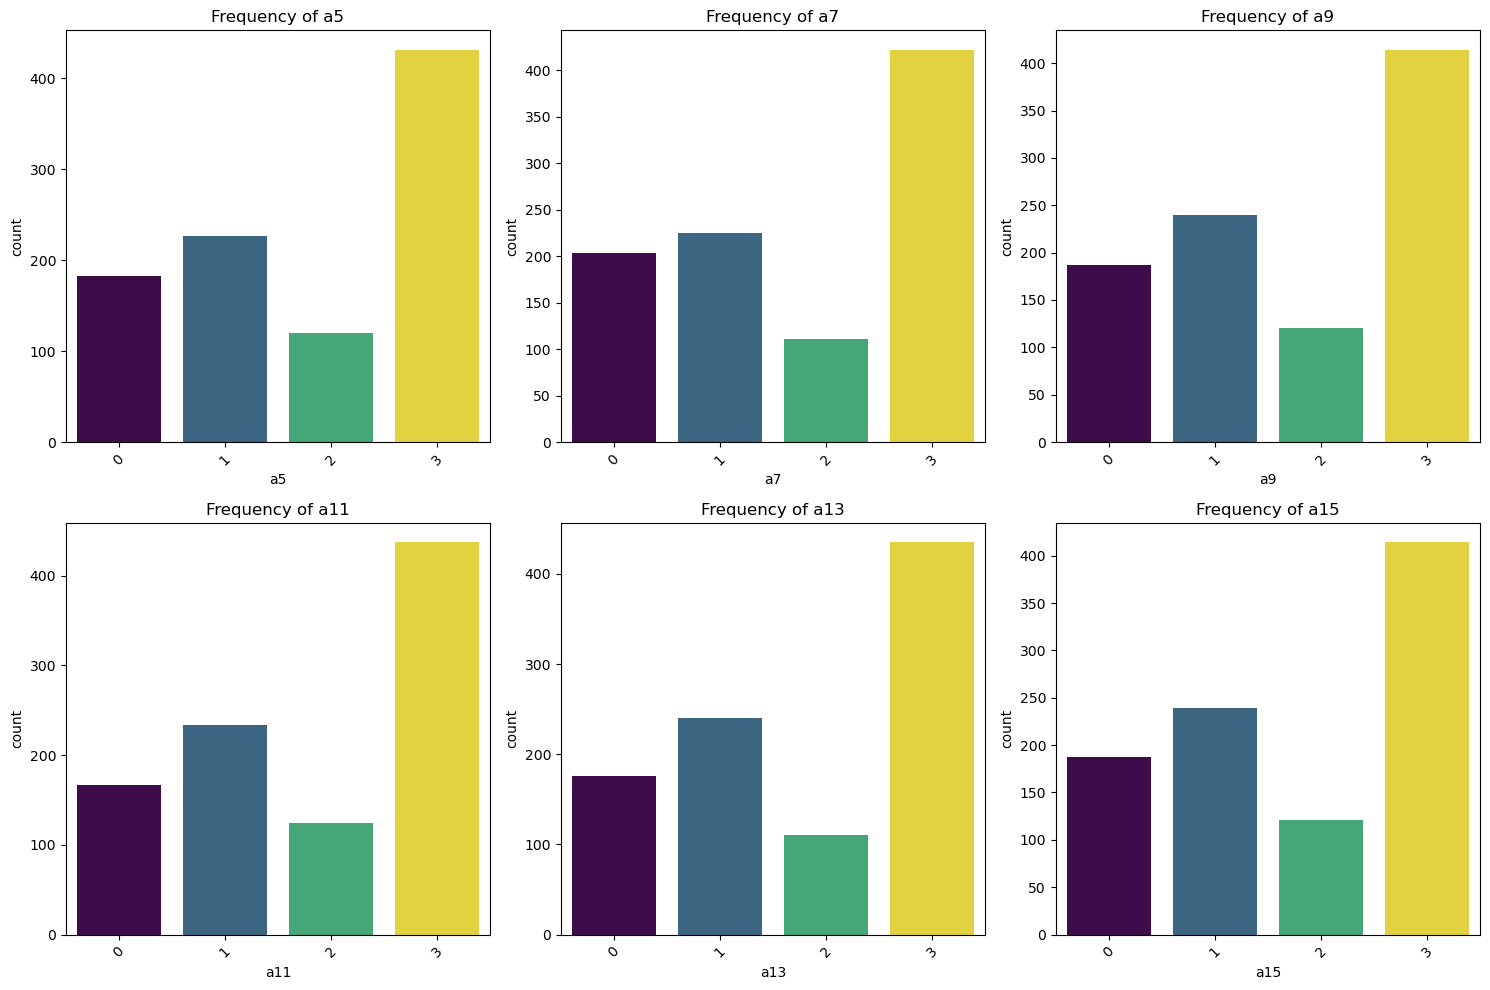

In [18]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns[:6], 1):  # Plot first 6 categorical columns
    plt.subplot(2, 3, i)
    sns.countplot(data=X_train, x=col, hue= col, palette='viridis', legend=False)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


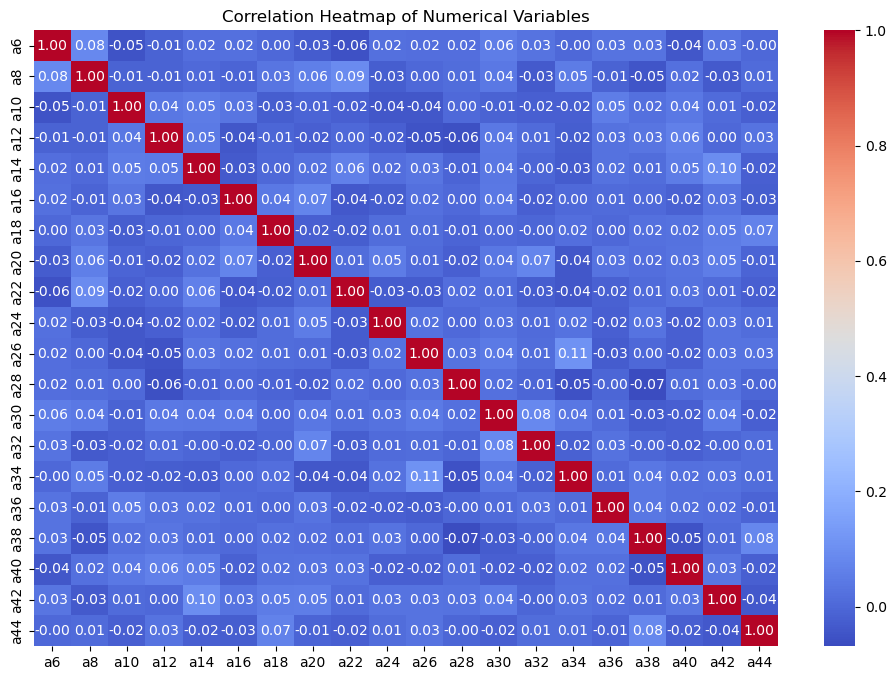

In [19]:
# 3. Correlation Heatmap for Numerical Variables
plt.figure(figsize=(12, 8))
sns.heatmap(X_train[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

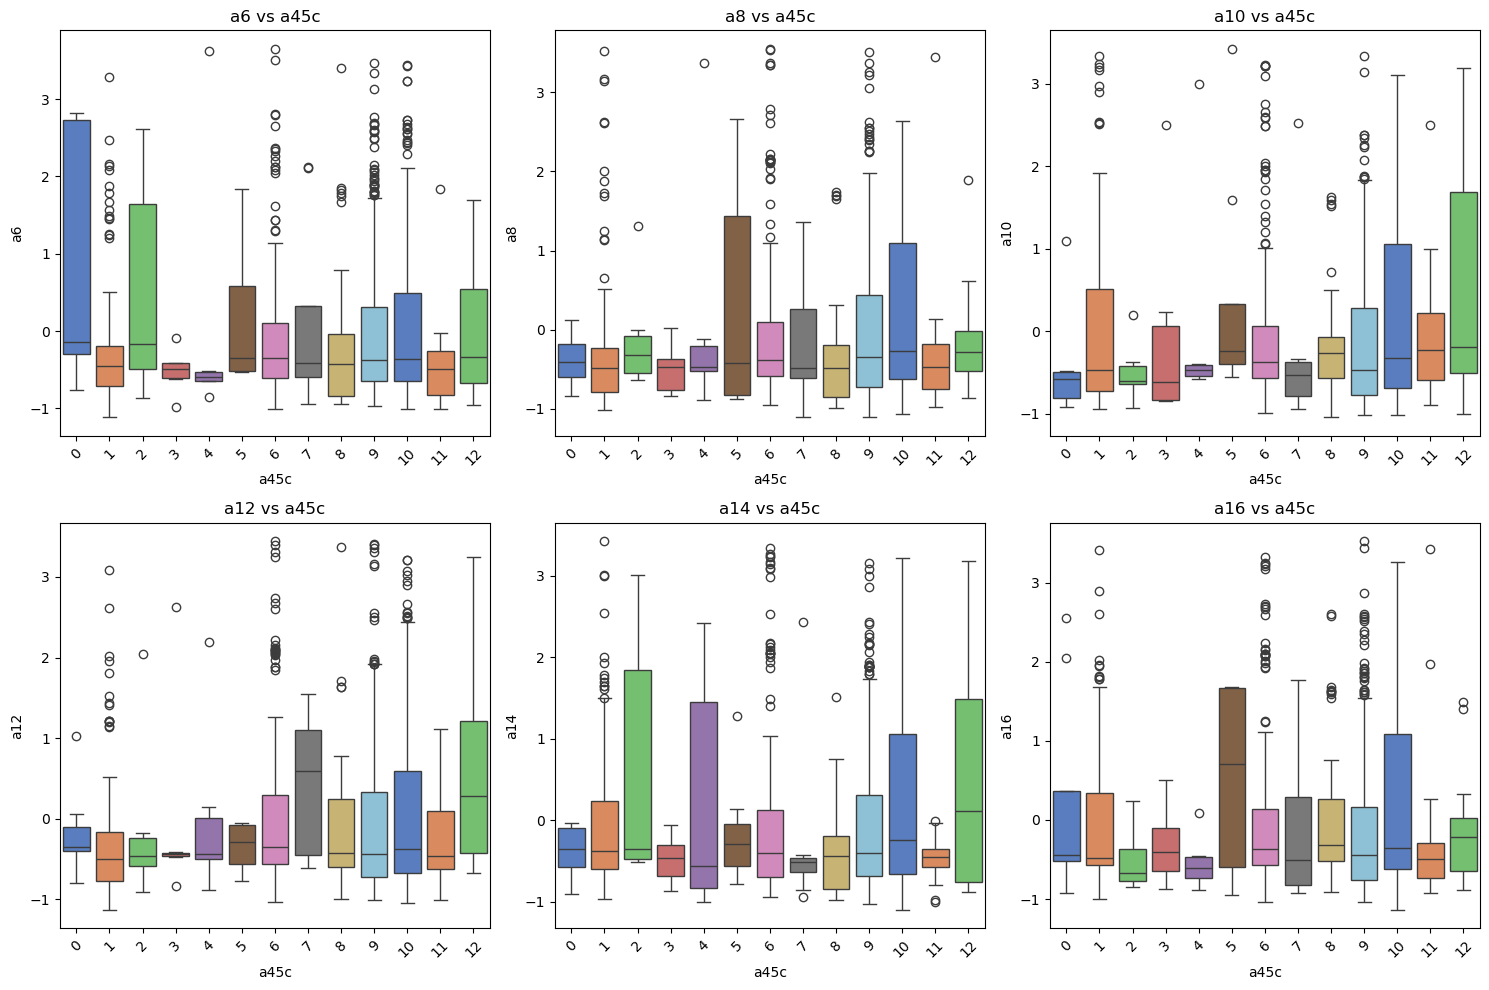

In [20]:
# 4. Relationship Between Numerical Features and Output (a45c)
X_train['a45c'] = y_train

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6], 1):  # First 6 numerical columns
    plt.subplot(2, 3, i)
    sns.boxplot(data=X_train, x='a45c', hue='a45c', y=col, palette='muted', legend=False)
    plt.title(f"{col} vs a45c")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

X_train = X_train.drop(columns=['a45c'])

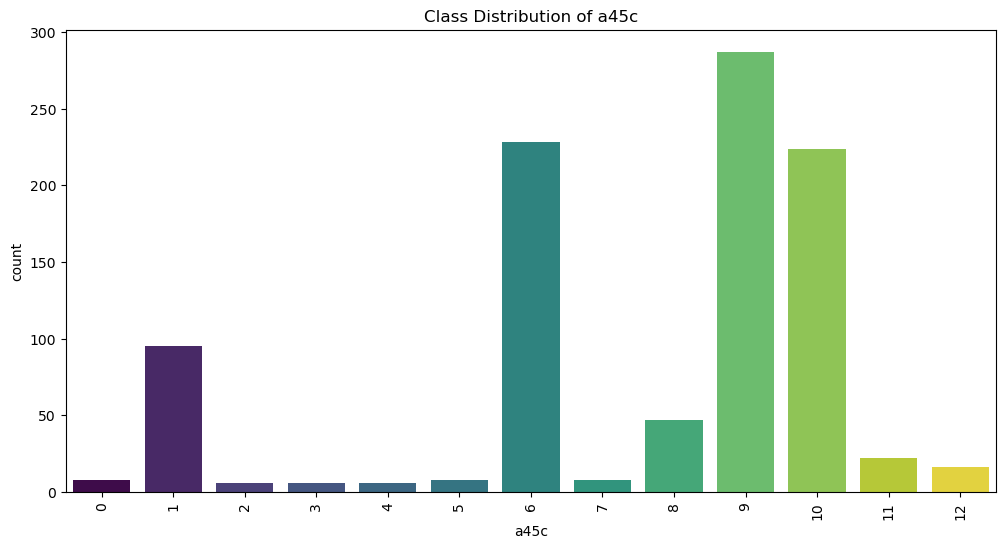

In [21]:
# 5. Class Distribution of the Output Variable (a45c)

X_train['a45c'] = y_train

plt.figure(figsize=(12, 6))
sns.countplot(data=X_train, x='a45c', hue='a45c', palette='viridis', legend=False)
plt.title('Class Distribution of a45c')
plt.xticks(rotation=90)
plt.show()

X_train = X_train.drop(columns=['a45c'])

We can see that the dataset is very imbalanced, having good representations of only 4 classes out of 13 different ones. 

### 1st ML Classifier - Random Forest 

Tree-based classifiers can handle highly imbalanced data, since they partition the feature space clearly. 
In Random Forest algorithm, we can try tuning the class_weight parameter in order to handle imbalance.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

#### Hyperparameter tuning with grid search - original dataset

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Max depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # The number of features to consider at each split
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters Found: ", grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters Found:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [25]:
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

print("Accuracy on Test Set (Best Model):", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))

Accuracy on Test Set (Best Model): 0.45643153526970953

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.61      0.54      0.57        57
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00        12
           9       0.37      0.71      0.49        72
          10       0.54      0.50      0.52        56
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         4

    accuracy                           0.46       241
   macro avg       0.12      0.13      0.12       241
weighted avg       0.38      0.46      0.

c:\Users\medak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\medak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\medak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The accuracy on the test set is 0.46, which is not a good result. It is expected since some classes (8 out of 13) had less than 10 instances in the test set. The dataset is heavily imbalanced and it does not contain enough data for the model to make sense. That's why we will try an oversampling method (SMOTE) that generates synthetic examples for the minority classes by interpolating between existing samples.

#### Hyperparameter tuning with grid search - balanced dataset

In [26]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Replace "4" with the desired number of cores

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

from collections import Counter
print("Class distribution before oversampling:", Counter(y_train))
print("Class distribution after oversampling:", Counter(y_train_oversampled))


Class distribution before oversampling: Counter({9: 287, 6: 228, 10: 224, 1: 95, 8: 47, 11: 22, 12: 16, 5: 8, 0: 8, 7: 8, 3: 6, 2: 6, 4: 6})
Class distribution after oversampling: Counter({9: 287, 6: 287, 3: 287, 10: 287, 1: 287, 2: 287, 8: 287, 11: 287, 12: 287, 5: 287, 4: 287, 0: 287, 7: 287})


In [28]:
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_oversampled, y_train_oversampled)

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],   
    'max_features': ['sqrt', 'log2', None], 
}

grid_search = GridSearchCV(estimator=rf_balanced, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_oversampled, y_train_oversampled)

print("Best Parameters Found: ", grid_search.best_params_)

y_pred = rf_balanced.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters Found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.23      0.21      0.22        24
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.47      0.60      0.52        57
           7       0.00      0.00      0.00         2
           8       0.33      0.17      0.22        12
           9       0.48      0.50      0.49        72
          10       0.42      0.45      0.43        56
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         4

    accuracy     

c:\Users\medak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\medak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\medak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Oversampling did not improve our model. It actually decreased the balanced accuracy to 0.42. However, at least it managed to predict some classes that the first model couldn't predict due to underrepresentation of the class (on the original dataset, the could predict only for the classes 6, 9, and 10, whereas after oversampling, the model predicted additionally for classes 1 and 8).

# 2nd ML algorithm - SVM

SVM finds a hyperplane or sets of hyperplanes which classify the dataset

In [71]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy on Test Set (Best Model):", accuracy_score(y_test, y_pred))

Accuracy on Test Set (Best Model): 0.5518672199170125


## 3rd ML algorithm - Neural Network

A standard backpropagation network with 80 input neurons, no hidden units, and 23 output units was trained. 
The input neurons are devided as follows: Per charcol atom there are 4 neurons, each corresponding to one multiplicity value (singulets, doublets, triplets, and quadruplets). For an input instance the frequency values of the skeleton atoms are fed through the neurons corresponding the multiplicity values. Every other neurons are fed a 0.


In [293]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler, Subset
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [314]:
# Define a simple neural network without hidden layers
class NeuralNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        return x

In [303]:
# Transform the input data to fit the network
# Create one-hot-encodings for multiplicities first
processed_data = pd.get_dummies(X, columns=categorical_columns, drop_first=False, dtype=float) 
# Multiply with the corresponding frequency value
for num_col, cat_col in zip(numerical_columns, categorical_columns):
    for i in range(4):
        processed_data[cat_col + f"_{i}"] = processed_data[cat_col + f"_{i}"] * processed_data[num_col]
# Remove frequency values, as they are redundant now
processed_data = processed_data.drop(numerical_columns, axis=1)
processed_data.head()

,a5_0,a5_1,a5_2,a5_3,a7_0,a7_1,a7_2,a7_3,a9_0,a9_1,...,a39_2,a39_3,a41_0,a41_1,a41_2,a41_3,a43_0,a43_1,a43_2,a43_3
0,0.0,0.0,0.0,139.2,0.0,33.2,0.0,0.0,30.7,0.0,...,0.0,0.0,0.0,0.0,0.0,42.2,0.0,0.0,0.0,18.6
1,144.0,0.0,0.0,0.0,0.0,66.7,0.0,0.0,46.2,0.0,...,0.0,0.0,0.0,16.5,0.0,0.0,0.0,0.0,0.0,26.6
2,30.7,0.0,0.0,0.0,0.0,0.0,0.0,26.8,0.0,0.0,...,0.0,0.0,0.0,0.0,42.4,0.0,139.8,0.0,0.0,0.0
3,0.0,0.0,0.0,37.2,0.0,0.0,0.0,17.4,0.0,16.7,...,0.0,0.0,0.0,20.8,0.0,0.0,0.0,0.0,0.0,36.5
4,0.0,12.2,0.0,0.0,154.6,0.0,0.0,0.0,0.0,0.0,...,0.0,71.4,0.0,0.0,36.8,0.0,0.0,0.0,46.2,0.0


In [341]:
# Train the neural network on training data
def train(model, train_data, batch_size, epochs, learning_rate, sampler):
    # Prepare data
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    # Training Loop
    y_train_true, y_train_pred =  [], []
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            # In last epoch also compute accuracy
            if epoch == epochs-1:
                _, predicted = torch.max(outputs, 1)
                y_train_true.extend(y_batch.numpy())
                y_train_pred.extend(predicted.numpy())
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        if epoch % 5 == 4:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}")

    return y_train_pred, y_train_true

In [305]:
# Evaluate Performance of model on validation data
def evaluate(model, val_data, batch_size) :
    # Prepare Data
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

    y_val_true, y_val_pred = [], []
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_val_true.extend(y_batch.numpy())
            y_val_pred.extend(predicted.numpy())
        val_loss /= len(val_loader)
            
    return y_val_pred, y_val_true

In [342]:
# Hyperparameters
epochs = 30
batch_size = 16
learning_rate = 0.01

num_classes = len(np.unique(y))
input_dim = processed_data.shape[1]
    
# 10-Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_metrics_val = []
fold_metrics_train = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold+1}")
        
    # Scale the numerical features
    scaler = StandardScaler()
    processed_data.loc[train_idx] = scaler.fit_transform(processed_data.loc[train_idx])  # Fit on training data
    processed_data.loc[val_idx] = scaler.transform(processed_data.loc[val_idx])       # Transform test data

    dataset = TensorDataset(torch.tensor(processed_data.values, dtype=torch.float32),torch.tensor(y.values, dtype=torch.long))

    # Handle class imbalance using WeightedRandomSampler
    class_counts = np.bincount(y.loc[train_idx])
    class_weights = 1.0 / class_counts
    sample_weights = class_weights[y.loc[train_idx]]
    sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(train_idx), replacement=True)
   
    # Subset training and validation data
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)

    # Initialize the model, loss function, and optimizer
    model = NeuralNet(input_dim, num_classes)

    y_train_pred, y_train_true = train(model, train_dataset, batch_size, epochs, learning_rate, sampler)
    y_val_pred, y_val_true = evaluate(model, val_dataset, batch_size)

    # Compute metrics 
    train_acc = accuracy_score(y_train_true, y_train_pred)
    val_acc = accuracy_score(y_val_true, y_val_pred)

    fold_metrics_train.append(train_acc)
    fold_metrics_val.append(val_acc)

# Overall Metrics
mean_acc_train = np.mean(fold_metrics_train)
std_acc_train = np.std(fold_metrics_train)
print(f"\nOverall Training Accuracy: {mean_acc_train:.4f} ± {std_acc_train:.4f}")
mean_acc_val = np.mean(fold_metrics_val)
std_acc_val = np.std(fold_metrics_val)
print(f"\nOverall Validation Accuracy: {mean_acc_val:.4f} ± {std_acc_val:.4f}")  

/Users/anna/Uni/Master/MachineLearning/diterpenes/.env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(



Fold 1
Epoch 5/30, Loss: 1.0188
Epoch 10/30, Loss: 0.8121
Epoch 15/30, Loss: 0.7301
Epoch 20/30, Loss: 0.6980
Epoch 25/30, Loss: 0.6652
Epoch 30/30, Loss: 0.6398

Fold 2
Epoch 5/30, Loss: 1.0307
Epoch 10/30, Loss: 0.8190
Epoch 15/30, Loss: 0.7390
Epoch 20/30, Loss: 0.6993
Epoch 25/30, Loss: 0.6663
Epoch 30/30, Loss: 0.6546

Fold 3
Epoch 5/30, Loss: 1.0415
Epoch 10/30, Loss: 0.8353
Epoch 15/30, Loss: 0.7455
Epoch 20/30, Loss: 0.7113
Epoch 25/30, Loss: 0.6761
Epoch 30/30, Loss: 0.6642

Fold 4
Epoch 5/30, Loss: 1.0105
Epoch 10/30, Loss: 0.8133
Epoch 15/30, Loss: 0.7336
Epoch 20/30, Loss: 0.6886
Epoch 25/30, Loss: 0.6594
Epoch 30/30, Loss: 0.6418

Fold 5
Epoch 5/30, Loss: 1.0056
Epoch 10/30, Loss: 0.8017
Epoch 15/30, Loss: 0.7214
Epoch 20/30, Loss: 0.6765
Epoch 25/30, Loss: 0.6452
Epoch 30/30, Loss: 0.6282

Fold 6
Epoch 5/30, Loss: 1.0273
Epoch 10/30, Loss: 0.8115
Epoch 15/30, Loss: 0.7361
Epoch 20/30, Loss: 0.6920
Epoch 25/30, Loss: 0.6624
Epoch 30/30, Loss: 0.6563

Fold 7
Epoch 5/30, Lo

In [343]:
from sklearn.metrics import matthews_corrcoef

# Compute Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_val_true, y_val_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)

# Classification report
print("Classification Report:")
print(classification_report(y_val_true, y_val_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val_true, y_val_pred))

Matthews Correlation Coefficient (MCC): 0.4897264446202535
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.38      0.42      0.40        12
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.75      0.83      0.79        29
           8       0.00      0.00      0.00         1
           9       0.75      0.50      0.60         6
          10       0.73      0.63      0.68        35
          11       0.47      0.61      0.53        28
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0

    accuracy                           0.60       120
   macro avg       0.29      0.28      0.29       12

/Users/anna/Uni/Master/MachineLearning/diterpenes/.env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anna/Uni/Master/MachineLearning/diterpenes/.env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anna/Uni/Master/MachineLearning/diterpenes/.env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior

As observed in the confusion matrix, the model performs well in classifying the majority of the overrepresented classes. However, it struggles to correctly classify the underrepresented classes due to the limited number of instances available in the dataset. While oversampling the training data improves the model’s ability to learn these underrepresented classes, it comes at the cost of reduced performance on the majority classes.